## Clustering:

is an unsupervised learning technique that groups similar data points together based on their features, without using labeled outputs.

Video: https://youtu.be/dK-GNL8FYq4?si=YLIBszDQZ9fr5OcO

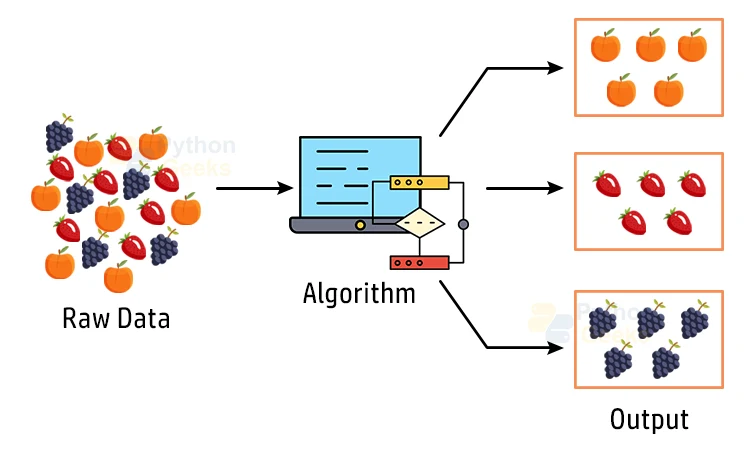


### Types of Clustering:

Partitioning Methods – e.g., K-Means, K-Medoids

Hierarchical Methods – e.g., Agglomerative, Divisive

Density-Based Methods – e.g., DBSCAN, OPTICS

Model-Based Methods – e.g., Gaussian Mixture Models (GMM)

Grid-Based Methods – e.g., STING

Fuzzy Clustering – e.g., Fuzzy C-Means

Graph-Based Clustering – e.g., Spectral Clustering

## 1. Partitioning Clustering Methods:
Partitioning methods divide the dataset into a fixed number of non-overlapping groups (or clusters), where each data point belongs to exactly one cluster. The goal is to optimize a criterion such as intra-cluster similarity (data points within a cluster are similar) and inter-cluster dissimilarity (clusters are different from each other).


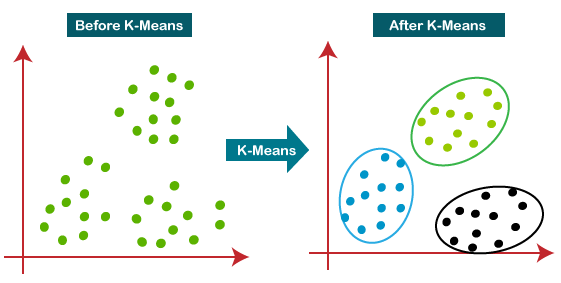

## K-Means Clustering:

Video: https://youtu.be/irC6w-7ugTE?si=W4H5SryYdPAPL8Of

How it works:

1. Choose K – Decide the number of clusters K.

2. Initialize Centroids – Randomly select K data points as initial cluster centroids.

3. Assign Points – Assign each data point to the nearest centroid based on distance (usually Euclidean).

4. Update Centroids – Calculate the new centroids as the mean of all points assigned to each cluster.

5. Repeat – Reassign points and update centroids until convergence (no change in assignments or centroids).


### Key Points:

1. Fast and scalable

2. Assumes spherical clusters

3. Sensitive to outliers and initial centroids

# Problem:

We want to group plants into 3 categories based on their height and leaf width.

###  Result:

The algorithm groups the plants into 3 clusters:

Cluster 1 (Small Plants): Plant 1, Plant 2

Cluster 2 (Medium Plants): Plant 3, Plant 4

Cluster 3 (Tall Plants): Plant 5, Plant 6

# Implementation: Load dummy data and imports

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Create dummy data
data = {
    'Height_cm': [10, 12, 25, 24, 50, 52],
    'Leaf_Width_cm': [5, 6, 10, 11, 20, 21]
}

df = pd.DataFrame(data)
df.head()

,Height_cm,Leaf_Width_cm
0,10,5
1,12,6
2,25,10
3,24,11
4,50,20


In [15]:
# Step 2: Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)
df

,Height_cm,Leaf_Width_cm,Cluster
0,10,5,2
1,12,6,2
2,25,10,0
3,24,11,0
4,50,20,1
5,52,21,1


In [16]:
# asign names
cluster_name_map = {
    2: 'Small Plant',
    0: 'Medium Plant',
    1: 'Tall Plant'
}

df['Plant_Size'] = df['Cluster'].map(cluster_name_map)
df

,Height_cm,Leaf_Width_cm,Cluster,Plant_Size
0,10,5,2,Small Plant
1,12,6,2,Small Plant
2,25,10,0,Medium Plant
3,24,11,0,Medium Plant
4,50,20,1,Tall Plant
5,52,21,1,Tall Plant


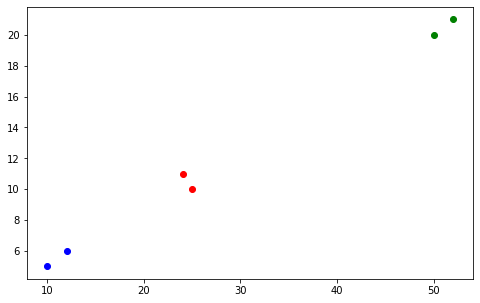

In [17]:
# Step 3: Plot the clusters
plt.figure(figsize=(8, 5))
colors = ['red', 'green', 'blue']
for i in range(3):
    clustered = df[df['Cluster'] == i]
    plt.scatter(clustered['Height_cm'], clustered['Leaf_Width_cm'],color=colors[i], label=f'Cluster {i}')

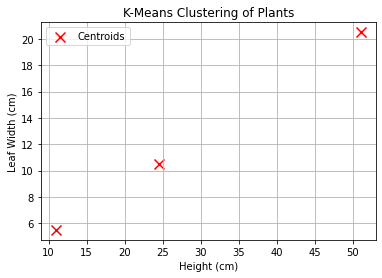

In [18]:
# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100, label='Centroids')

plt.title('K-Means Clustering of Plants')
plt.xlabel('Height (cm)')
plt.ylabel('Leaf Width (cm)')
plt.legend()
plt.grid(True)
plt.show()